In [1]:
from binance_wrapper import BinanceWrapper
from analytics import Analytics

import matplotlib.pyplot as plt

/Users/miller/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/miller/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Requesting data

In [22]:
# Products being requested
symbols = ['BTCUSDT', 'ETHUSDT', ]

# Time period being requested
start_time, end_time = '2025-08-01', '2025-08-09'

# Granularity of the requested data
interval = '1h'

In [23]:
data = BinanceWrapper().get_data(symbols=symbols,
                                 start_time=start_time,
                                 end_time=end_time,
                                 interval=interval)

### Computing analytics

In [24]:
bitcoin_df = data['BTCUSDT']

window = 10

bitcoin_df = Analytics.moving_average(df=bitcoin_df, column='CLOSE', window=window)

bitcoin_df = Analytics.exponential_ma(df=bitcoin_df, column='CLOSE', window=window)

bitcoin_df = Analytics.bollinger_bands(df=bitcoin_df, column='CLOSE', window=window)

In [25]:
cols = ['CLOSE', f'MA{window}_CLOSE', f'BB_Upper_{window}', f'BB_Lower_{window}']

bitcoin_df.dropna(subset=cols, inplace=True)

### Computing plots

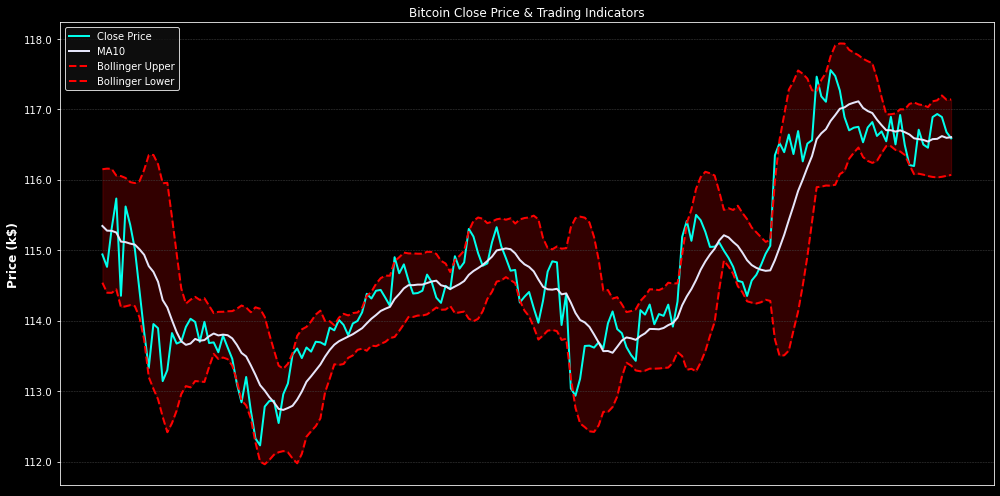

In [40]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.style.use("dark_background")  # Bloomberg-like dark theme

fig, ax = plt.subplots(figsize=(14, 7))
line_width = 2

# Plot lines
ax.plot(bitcoin_df['CLOSE'], label='Close Price', color='#00ffec', linewidth=line_width)
ax.plot(bitcoin_df[f'MA{window}_CLOSE'], label=f'MA{window}', color='lavender', linewidth=line_width)
ax.plot(bitcoin_df[f'BB_Upper_{window}'], label='Bollinger Upper', linestyle='--', color='red', linewidth=line_width)
ax.plot(bitcoin_df[f'BB_Lower_{window}'], label='Bollinger Lower', linestyle='--', color='red', linewidth=line_width)

# Fill area between Bollinger Bands
ax.fill_between(
    bitcoin_df.index,
    bitcoin_df[f'BB_Upper_{window}'],
    bitcoin_df[f'BB_Lower_{window}'],
    color='red',
    alpha=0.2
)

# Bloomberg-like grid
ax.grid(color='#444444', linestyle='--', linewidth=0.5)

# Format y-axis to thousands
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e3:.1f}'))

# Remove x-axis ticks and labels
ax.set_xticks([])
ax.set_xticklabels([])

# Labels and legend
ax.set_ylabel('Price (k$)', fontsize=12, fontweight='bold', color='white')
ax.legend(facecolor='#111111', edgecolor='white', fontsize=10)
ax.set_title('Bitcoin Close Price & Trading Indicators')

plt.tight_layout()
plt.show()
